In [1]:
from google.colab import drive
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt 

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
sys.path.append('/content/gdrive/MyDrive/ADLM')

In [ ]:
WORKING_DIR = '/content/gdrive/MyDrive/ADLM/'

In [11]:
from BIDS import BIDS_FILE, Centroids, Image_Reference, Centroid_Reference, NII
from BIDS.snapshot2D.snapshot_modular import Snapshot_Frame,create_snapshot, Visualization_Type
from __future__ import annotations
from BIDS import BIDS_Global_info
bids_global_object = BIDS_Global_info(['/content/gdrive/MyDrive/ADLM/verse19/dataset-verse19training/'],['rawdata',"rawdata_dixon","derivatives"],additional_key = ["sequ", "seg", "ovl"], verbose=True,)


[!] Dataset  does not start with 'dataset-'


In [ ]:
#!unzip "/content/gdrive/MyDrive/ADLM/dataset-verse19training.zip" -d "/content/gdrive/MyDrive/ADLM/verse19/"

In [12]:
for subject_name, subject_container in bids_global_object.enumerate_subjects(sort=True):
    #Lets filter out in formation we don't want.
    #Lets only search for CT images

    #start the search, you can start multiple independent filters.
    query = subject_container.new_query(flatten=True)
    # We want to filter only now for individual files and not for a group of files (file family), so we set flatten=True

    #This call removes all files that do not end with "_ct.[filetype]"
    query.filter('format','ct')
    #Lets remove all files that don't have a nifty.     
    query.filter("Filetype", "nii.gz")

    #now we can loop over the CT files.
    for bids_file in query.loop_list(sort=True):
        #finally we get a bids_file
        print('CT BIDS file:',bids_file)
        # We will look at bids_files closer soon, lets just open the nifty as a nibabel.
        nii = bids_file.open_nii()
        print('shape of nii-file:',nii.shape)
        break
    break

CT BIDS file: sub-verse004_ct.['json', 'nii.gz']	 parent = rawdata
shape of nii-file: (161, 338, 61)


In [13]:

print("\nFull file name")
print(bids_file.file['nii.gz'])
print("\nfiletypes")
print(bids_file.file.keys())
print("\nformat")
print(bids_file.format)
print("\nkey-value")
print(bids_file.info)

print("\n\nparent")
print(bids_file.get_parent('nii.gz'))
print("\nthe 4 path parts")
print(bids_file.get_path_decomposed())


Full file name
/content/gdrive/MyDrive/ADLM/verse19/dataset-verse19training/rawdata/sub-verse004/sub-verse004_ct.nii.gz

filetypes
dict_keys(['json', 'nii.gz'])

format
ct

key-value
{'sub': 'verse004'}


parent
rawdata

the 4 path parts
(PosixPath('/content/gdrive/MyDrive/ADLM/verse19/dataset-verse19training'), 'rawdata', 'sub-verse004', 'sub-verse004_ct.json')


In [15]:
for subject_name, subject_container in bids_global_object.enumerate_subjects(sort=True):
    query = subject_container.new_query(flatten=False) #<- flatten=False means we search for family
    #This call removes all families that do not have at least one file that end with "_ct.[filetype]"
    query.filter('format','ct')
    #Lets require a segmentation
    query.filter('seg','vert')
    query.filter('seg','subreg')
    
    #now we can loop over the CT files.
    for bids_family in query.loop_dict(sort=True):
        #finally we get a bids_family
        print('Files in this family:',bids_family.get_key_len())
        print(bids_family)
        break
    break

Files in this family: {'ct': 1, 'msk_seg-vert': 1, 'ctd_seg-subreg': 1, 'snp_seg-vert': 1}
ct: [sub-verse004_ct.['json', 'nii.gz']	 parent = rawdata]
msk_seg-vert: [sub-verse004_seg-vert_msk.['nii.gz']	 parent = derivatives]
ctd_seg-subreg: [sub-verse004_seg-subreg_ctd.['json']	 parent = derivatives]
snp_seg-vert: [sub-verse004_seg-vert_snp.['png']	 parent = derivatives]



In [ ]:
df = pd.read_excel(WORKING_DIR + "VerSe_masterlist.xlsx")
df.head()       

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Comment
0,4,sub-verse004,0,NaN,1.0,L5,NaN,NaN
1,5,sub-verse005,0,NaN,1.0,L5,NaN,NaN
2,6,sub-verse006,0,NaN,1.0,L5,NaN,NaN
3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,sub-verse008,0,NaN,1.0,L5,NaN,NaN


[*] Snapshot saved: /content/sample_data/out.jpg


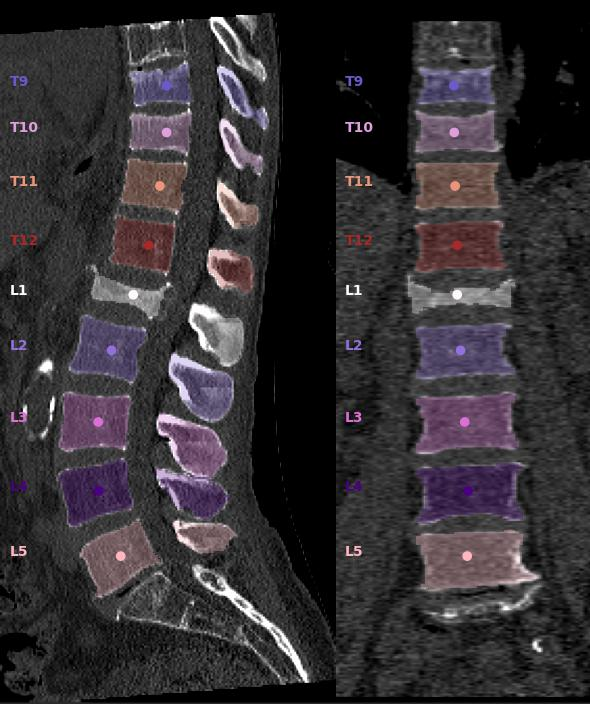

In [ ]:
from IPython.display import Image
root = WORKING_DIR + 'verse19/dataset-verse19training'
ct_file = Path(root,'rawdata/sub-verse004/sub-verse004_ct.nii.gz')
vert_file = Path( root, 'derivatives/sub-verse004/sub-verse004_seg-vert_msk.nii.gz')
ctd_file = Path(root,'derivatives/sub-verse004/sub-verse004_seg-subreg_ctd.json')

out_file = Path('/content/sample_data/out.jpg')
ct_frame = Snapshot_Frame(ct_file,segmentation=vert_file,centroids=ctd_file,sagittal=True,coronal=True,mode='CT')
create_snapshot(out_file,[ct_frame])

Image(filename=out_file) 